In [612]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [613]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows=6729)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


In [614]:
#other ways to import and not have errors:
#gdp_df = pd.read_csv(‘../data/gdp_percapita.csv’,skipfooter=2,engine=‘python’)
#internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines=False)

In [615]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


7. Shape of each dataframe. gdp: 6731,4 (6729 actual data ends);  internet:4675,4 (4495 actual data)

In [616]:
gdp_df.shape

(6729, 4)

In [617]:
internet_df.shape

(4495, 4)

8. Take a look at the data types for the columns in each table.



In [618]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [619]:
internet_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [620]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [621]:
internet_df.dtypes #can also call internet_df.info() to get full picture info

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [622]:
gdp_df.tail(10) #footnote starts at index 6729

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [623]:
internet_df.tail(10) #footnote starts at 4498

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


10. Drop the 'value footnotes' data (column) from both datasets. Check that this worked as expected.

In [624]:
gdp_df = gdp_df.drop(columns =['Value Footnotes'])
gdp_df.tail(5)

,Country or Area,Year,Value
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849
6728,Zimbabwe,1990,2819.549467


In [625]:
internet_df = internet_df.drop(columns=['Value Footnotes'])
internet_df.tail(5)

,Country or Area,Year,Value
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000


11. Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [626]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value':'GDP_Per_Capita'})
gdp_df.tail()

,Country,Year,GDP_Per_Capita
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849
6728,Zimbabwe,1990,2819.549467


12. Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [627]:
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value':'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


13. Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.
14. Look at the first five rows of your new data frame to confirm it merged correctly

In [631]:
gdp_df['Year']=gdp_df['Year'].astype(int) 

gdp_and_internet_use = pd.merge(gdp_df,internet_df,on= None, how='outer', sort=True)
# another way to merge: gdp_and_internet_use = pd.merge(gdp_df, internet_df, how = 'outer', on = ['Country', 'Year'])gdp_and_internet_use.head(5)

15. Look at the last five rows to make sure the data is clean and as expected.



In [632]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Zimbabwe,2014,2506.490220,19.89
7701,Zimbabwe,2015,2509.008140,NaN
7702,Zimbabwe,2016,2489.097494,NaN
7703,Zimbabwe,2017,2568.410072,NaN
7704,Zimbabwe,2018,2688.406942,NaN


16. Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [634]:
gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2004,1025.208245,0.105809
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2014,1795.735834,6.390000
33,Albania,2004,7001.054082,2.420388
38,Albania,2009,9525.377979,41.200000
...,...,...,...,...
7666,Zambia,2009,3115.937579,6.310000
7671,Zambia,2014,3684.685507,17.340000
7690,Zimbabwe,2004,2104.143512,6.564045
7695,Zimbabwe,2009,1632.999866,11.360000


In [638]:
gdp_and_internet_use['Year'].unique() #to check which years are in the subset

array([2004, 2009, 2014])

17. Create three new data frames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [640]:
gdpiu_2004 = gdp_and_internet_use[(gdp_and_internet_use.Year == 2004)]
gdpiu_2004.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2004,1025.208245,0.105809
33,Albania,2004,7001.054082,2.420388
62,Algeria,2004,11845.170512,4.634475
86,Andorra,2004,NaN,26.837954
111,Angola,2004,4604.657044,0.464815


In [641]:
gdpiu_2009 = gdp_and_internet_use[(gdp_and_internet_use.Year == 2009)]
gdpiu_2009.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2009,1502.354073,3.55
38,Albania,2009,9525.377979,41.20
67,Algeria,2009,12697.690780,11.23
91,Andorra,2009,NaN,78.53
116,Angola,2009,6292.534856,6.00


In [642]:
gdpiu_2014 = gdp_and_internet_use[(gdp_and_internet_use.Year == 2014)]
gdpiu_2014.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2014,1795.735834,6.39
43,Albania,2014,10700.993216,60.10
72,Algeria,2014,13557.769757,18.09
96,Andorra,2014,NaN,95.90
121,Angola,2014,6813.052106,21.26


18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).  Answer: Iceland, 98.16%

In [643]:
gdpiu_2014.Internet_Users_Pct.max()

98.16

In [645]:
gdpiu_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3188,Iceland,2014,42774.888849,98.16


19. Which country had the lowest percentage of internet users in 2014? What was the percentage?Answer: Dem.People's Rep. of Korea, 0% 

In [646]:
gdpiu_2014.sort_values(by = 'Internet_Users_Pct', ascending = True).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1599,Dem. People's Rep. of Korea,2014,NaN,0.0


In [649]:
gdpiu_2014.loc[gdpiu_2014['Internet_Users_Pct'].idxmin()] #another way to find max or min

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 1599, dtype: object

20. Repeat for 2004 and 2009. Answers: 2004: highest, Sweden 83.89%, lowest, DPROK 0%; 2009: highest, Iceland 93%, lowest, DPROK 0%

In [654]:
gdpiu_2004.sort_values(by = 'Internet_Users_Pct', ascending = False).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6667,Sweden,2004,40177.850408,83.89


In [655]:
gdpiu_2004.sort_values(by = 'Internet_Users_Pct', ascending = True).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1590,Dem. People's Rep. of Korea,2004,NaN,0.0


In [656]:
gdpiu_2009.sort_values(by = 'Internet_Users_Pct', ascending = False).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3183,Iceland,2009,41505.084834,93.0


In [657]:
gdpiu_2009.sort_values(by = 'Internet_Users_Pct', ascending = True).head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1595,Dem. People's Rep. of Korea,2009,NaN,0.0


21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?   Answer: Macao SAR, China; 130,439.10

In [658]:
gdpiu_2014['GDP_Per_Capita'].argmax() #to get max index - index 151
hgdp_2014 = gdpiu_2014.iloc[151:152, 0:4]
hgdp_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4254,"Macao SAR, China",2014,130439.106674,NaN


22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?  Answer: Central African Republic, 672.68

In [659]:
gdpiu_2014['GDP_Per_Capita'].argmin() #to get min index - index 40
lgdp_2014 = gdpiu_2014.iloc[40:41, 0:4]
lgdp_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1151,Central African Republic,2014,672.681648,NaN


23. Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

Text(0.5, 1.0, '2004 Internet Users vs GDP Per Capita')

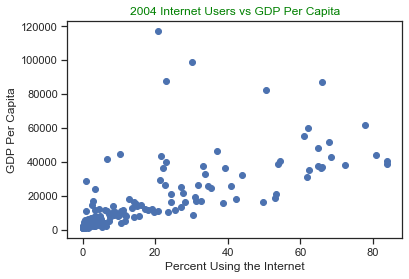

In [662]:
plt.scatter(x='Internet_Users_Pct', y='GDP_Per_Capita', data = gdpiu_2004)
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita');
plt.title('2004 Internet Users vs GDP Per Capita', color = 'green')

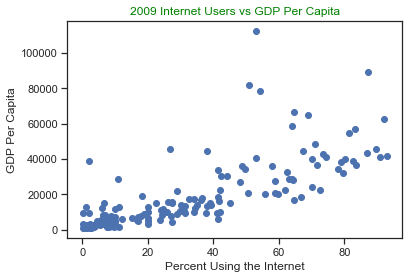

In [666]:
plt.scatter(x='Internet_Users_Pct', y='GDP_Per_Capita', data = gdpiu_2009)
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita');
plt.title('2009 Internet Users vs GDP Per Capita', color = 'green');  #using a semicolon at the end, the text for the plot does not appear

Text(0.5, 1.0, '2014 Internet Users vs GDP Per Capita')

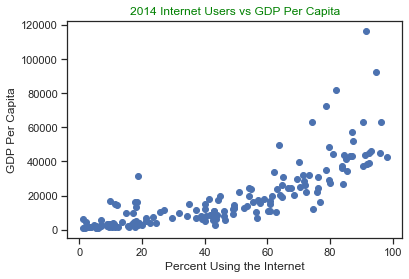

In [667]:
plt.scatter(x='Internet_Users_Pct', y='GDP_Per_Capita', data = gdpiu_2014)
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita');
plt.title('2014 Internet Users vs GDP Per Capita', color = 'green')

24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.  Answer: Throughout the years, more low GDP per capita had internet use.  These graphs show that as GDP per capita increases, so does internet use - indiciating a linear relationship. 

25. Look at the distribution of gdp per capita values for 2014. Is it unimodal?  Answer: Yes, unimodal from 0-20k GDP Per Capita.

Text(0.5, 0, 'GDP Per Capita')

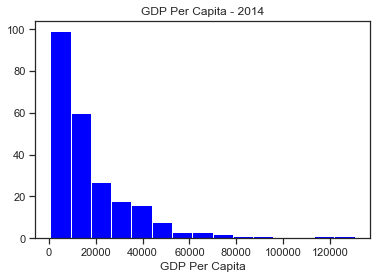

In [669]:
plt.hist(gdpiu_2014['GDP_Per_Capita'], color = 'blue', edgecolor = 'white',bins=15)
plt.title('GDP Per Capita - 2014')
plt.xlabel('GDP Per Capita')

26. Look at the distribution of Internet Use for 2014. Is it unimodal?  Answer: Internet use looks bimodal.

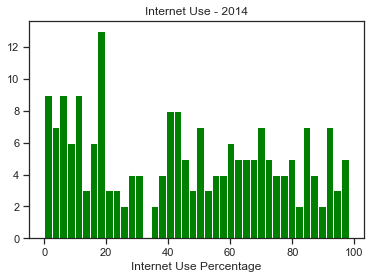

In [676]:
plt.hist(gdpiu_2014['Internet_Users_Pct'], color = 'green', edgecolor = 'white', bins=40)
plt.title('Internet Use - 2014')
plt.xlabel('Internet Use Percentage')
plt.show()

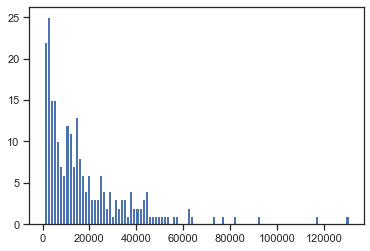

In [675]:
plt.hist(gdpiu_2014[gdpiu_2014['GDP_Per_Capita'].notnull()]['GDP_Per_Capita'], bins = 100); #another way to plot

27. What are the top 5 countries in terms of internet use in 2014?  Answer: Iceland, Bermuda, Norway, Denmark, & Andorra

In [679]:
iu_2014_top5 = gdpiu_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).Country.head(5)
iu_2014_top5

3188    Iceland
605     Bermuda
5256     Norway
1653    Denmark
96      Andorra
Name: Country, dtype: object

28. Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.

In [680]:
toplist = ['Iceland', 'Bermuda','Norway','Denmark','Andorra']
top_5_internet = gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(toplist)].reset_index(drop=True)
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Andorra,2004,NaN,26.837954
1,Andorra,2009,NaN,78.530000
2,Andorra,2014,NaN,95.900000
3,Bermuda,2004,55452.638880,60.990867
4,Bermuda,2009,57151.919132,83.250000
5,Bermuda,2014,NaN,96.800000
6,Denmark,2004,43670.446201,80.930000
7,Denmark,2009,43382.615688,86.840000
8,Denmark,2014,45057.083449,95.990000
9,Iceland,2004,38893.378798,83.880000


In [681]:
#another way to query the top 5 countries for internet use:
#my_list = ['Iceland', 'Bermuda','Norway','Denmark','Andorra']
#internet_top5 = gdp_and_internet_use.query("Country in @my_list")
#internet_top5

29. Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

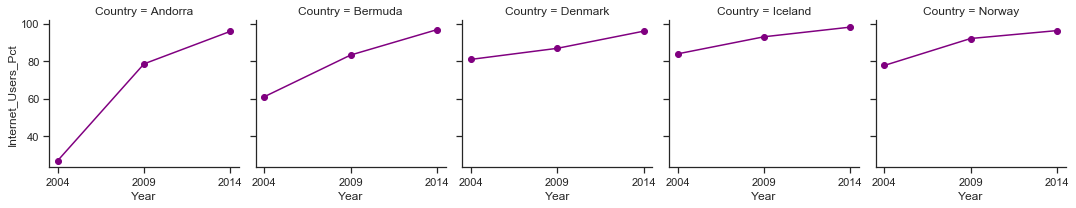

In [687]:
facet_grid = sns.FacetGrid(top_5_internet, col='Country') 
facet_grid = facet_grid.map(plt.plot,'Year','Internet_Users_Pct',marker="o", color='purple')

facet_grid.set(xticks=[2004,2009,2014])

30. Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?  Answer: Dem. People's Rep. of Korea

In [688]:
iu_2014_bottom5 = gdpiu_2014.sort_values(by = 'Internet_Users_Pct', ascending = True).head(5)
iu_2014_bottom5

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1599,Dem. People's Rep. of Korea,2014,NaN,0.00
2013,Eritrea,2014,NaN,0.99
6970,Timor-Leste,2014,6466.737732,1.14
916,Burundi,2014,768.469837,1.38
6247,Somalia,2014,NaN,1.63


In [689]:
bottomlist = ["Dem. People's Rep. of Korea",'Eritrea', 'Timor-Leste','Burundi','Somalia']
bottom_5_internet = gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(bottomlist)].reset_index(drop=True)
bottom_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Burundi,2004,708.833720,0.349060
1,Burundi,2009,721.063140,0.900000
2,Burundi,2014,768.469837,1.380000
3,Dem. People's Rep. of Korea,2004,NaN,0.000000
4,Dem. People's Rep. of Korea,2009,NaN,0.000000
5,Dem. People's Rep. of Korea,2014,NaN,0.000000
6,Eritrea,2004,2317.349879,NaN
7,Eritrea,2009,1950.533339,0.540000
8,Eritrea,2014,NaN,0.990000
9,Somalia,2004,NaN,1.053455


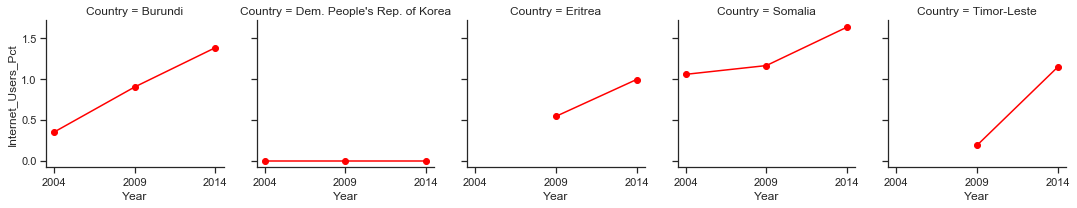

In [450]:
facet_grid2 = sns.FacetGrid(bottom_5_internet, col='Country') 
facet_grid2 = facet_grid2.map(plt.plot,'Year','Internet_Users_Pct',marker="o", color='red')

facet_grid2.set(xticks=[2004,2009,2014])

31. Find the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends in gdp per capita for those 5 countries. Use a seaborn facet grid for this.   Answer: Countries:Macao SAR, China, Qatar, Luxembourg,Singapore, Brunei

In [690]:
gdp_2014_top5 = gdpiu_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head(5)
gdp_2014_top5

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4254,"Macao SAR, China",2014,130439.106674,NaN
5742,Qatar,2014,116693.507701,91.49
4225,Luxembourg,2014,92349.186429,94.67
6109,Singapore,2014,81965.361071,82.00
790,Brunei,2014,76448.593329,NaN


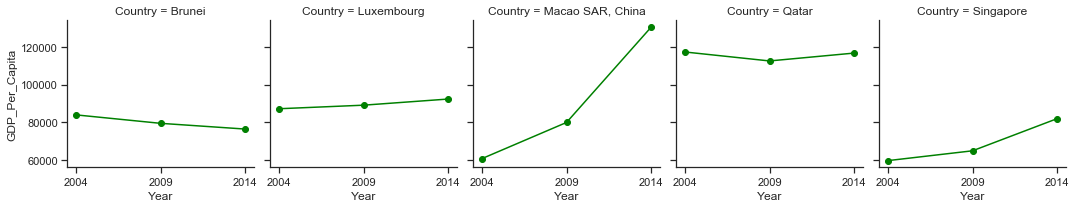

In [691]:
top_gdp = ['Macao SAR, China', 'Qatar', 'Luxembourg','Singapore', 'Brunei']
top_gdp_trends = gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(top_gdp)].reset_index(drop=True)

top_gdp_trends_fg = sns.FacetGrid(top_gdp_trends, col='Country') 
top_gdp_trends_fg = top_gdp_trends_fg.map(plt.plot,'Year','GDP_Per_Capita',marker="o", color='green')
top_gdp_trends_fg.set(xticks=[2004,2009,2014])

In [692]:
#another approach to 10 year trend Facetgrid (Mahesh)
#bottom_5_gdp = gdp_and_internet_2014[gdp_and_internet_2014['GDP_Per_Capita'].notnull()].sort_values(by = 'GDP_Per_Capita', ascending = False).tail()['Country'].tolist()
#gdp_and_internet_bottom_5_gdp = gdp_and_internet_use[(gdp_and_internet_use['Country'].isin(bottom_5_gdp))& (gdp_and_internet_use['Year']>= 2004)&         
                                #(gdp_and_internet_use['Year']<=2014)].sort_values(['Country', 'Year'])
#g = sns.FacetGrid(gdp_and_internet_bottom_5_gdp, col = 'Country')
#g.map(plt.plot, 'Year', 'GDP_Per_Capita');

32. Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.

In [693]:
gdp_2014_bottom5 = gdpiu_2014.sort_values(by = 'GDP_Per_Capita', ascending = True).head(5)
gdp_2014_bottom5

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1151,Central African Republic,2014,672.681648,NaN
916,Burundi,2014,768.469837,1.38
1624,Dem. Rep. Congo,2014,784.872656,NaN
5139,Niger,2014,900.136918,1.95
4334,Malawi,2014,1142.530804,5.83


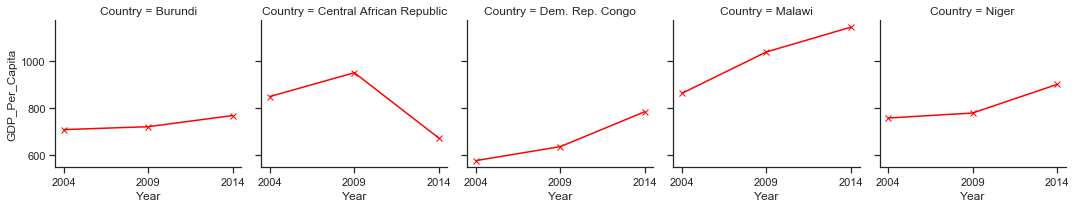

In [695]:
bottom_gdp = ['Central African Republic', 'Burundi', 'Dem. Rep. Congo','Niger', 'Malawi']
bottom_gdp_trends = gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(bottom_gdp)].reset_index(drop=True)

bottom_gdp_trends_fg = sns.FacetGrid(bottom_gdp_trends, col='Country') 
bottom_gdp_trends_fg = bottom_gdp_trends_fg.map(plt.plot,'Year','GDP_Per_Capita',marker="x", color='red')
bottom_gdp_trends_fg.set(xticks=[2004,2009,2014])

33. Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?   
Answer: DPROK is consistent with 0% of internet usage over the 10 years.
Central Aftican Republic had a large downturn of GDP per capita over the 10 years. After further research, CAR is among on of the ten poorest countries in the world. There is ongoing conflict within CAR that has hampered telecommunication and media development in the country.

Bonus exercise:
Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [517]:
employed_df = pd.read_csv('../data/employed_pop.csv', nrows=79104)
employed_df.tail(6)

,Country or Area,Year,Area,Sex,Age,Occupation,Record Type,Reliability,Source Year,Value,Value Footnotes
79098,Zimbabwe,2002,Total,Female,Unknown,Skilled agricultural and fishery workers (ISCO...,Census - de facto - complete tabulation,"Final figure, complete",2009,8371.0,NaN
79099,Zimbabwe,2002,Total,Female,Unknown,Craft and related trades workers (ISCO 88 - 7),Census - de facto - complete tabulation,"Final figure, complete",2009,393.0,NaN
79100,Zimbabwe,2002,Total,Female,Unknown,Plant and machine operators and assemblers (IS...,Census - de facto - complete tabulation,"Final figure, complete",2009,9.0,NaN
79101,Zimbabwe,2002,Total,Female,Unknown,Elementary occupations (ISCO 88 - 9),Census - de facto - complete tabulation,"Final figure, complete",2009,1376.0,NaN
79102,Zimbabwe,2002,Total,Female,Unknown,Unknown,Census - de facto - complete tabulation,"Final figure, complete",2009,83.0,NaN
79103,Zimbabwe,2002,Total,Female,Unknown,Total (ISCO 88),Census - de facto - complete tabulation,"Final figure, complete",2009,11242.0,NaN


In [518]:
employed_df = employed_df.drop(columns =['Value Footnotes','Reliability','Record Type','Area'])
employed_df.head(5)

,Country or Area,Year,Sex,Age,Occupation,Source Year,Value
0,Åland Islands,2000,Both Sexes,15 - 24,Armed forces (ISCO 88 - 0),2009,0.0
1,Åland Islands,2000,Both Sexes,15 - 24,"Legislators, senior officials and managers (IS...",2009,1.0
2,Åland Islands,2000,Both Sexes,15 - 24,Professionals (ISCO 88 - 2),2009,58.0
3,Åland Islands,2000,Both Sexes,15 - 24,Technicians and associate professionals (ISCO ...,2009,65.0
4,Åland Islands,2000,Both Sexes,15 - 24,Clerks (ISCO 88 - 4),2009,80.0


In [519]:
employed_df.dtypes #to see if Year is in same type as other dataframes

Country or Area     object
Year                 int64
Sex                 object
Age                 object
Occupation          object
Source Year          int64
Value              float64
dtype: object

In [530]:
gdp_and_internet_use_full = pd.merge(gdp_df,internet_df,on= None, how='outer', sort=True)
gdp_and_internet_use_full

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1016.245409,0.004561
3,Afghanistan,2003,1055.557459,0.087891
4,Afghanistan,2004,1025.208245,0.105809
...,...,...,...,...
7700,Zimbabwe,2014,2506.490220,19.890000
7701,Zimbabwe,2015,2509.008140,NaN
7702,Zimbabwe,2016,2489.097494,NaN
7703,Zimbabwe,2017,2568.410072,NaN


In [531]:
employed_df['Year']=employed_df['Year'].astype(int) 
employed_df = employed_df.rename(columns = {'Country or Area': 'Country'})

employed_and_gdp_and_internet_use = pd.merge(gdp_and_internet_use_full,employed_df,on= None, how='outer', sort=True)
employed_and_gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Sex,Age,Occupation,Source Year,Value
0,Afghanistan,1990,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,NaN,0.004723,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,1016.245409,0.004561,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2003,1055.557459,0.087891,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2004,1025.208245,0.105809,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
86665,Åland Islands,2000,NaN,NaN,Female,65 +,Craft and related trades workers (ISCO 08 - 7),2009.0,0.0
86666,Åland Islands,2000,NaN,NaN,Female,65 +,"Plant and machine operators, and assemblers (I...",2009.0,0.0
86667,Åland Islands,2000,NaN,NaN,Female,65 +,Elementary occupations (ISCO 08 - 9),2009.0,3.0
86668,Åland Islands,2000,NaN,NaN,Female,65 +,Unknown,2009.0,7.0


In [534]:
employed_top10 = employed_and_gdp_and_internet_use.sort_values(by = 'Value', ascending = False).head(10)
employed_top10

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Sex,Age,Occupation,Source Year,Value
33275,Indonesia,2010,8457.556555,10.92000,Both Sexes,15 +,Total (ISCO 68),2012.0,109670399.0
9806,Brazil,2010,14619.507411,40.65000,Both Sexes,10 +,Total (ISCO 88),2013.0,86353839.0
9818,Brazil,2010,14619.507411,40.65000,Both Sexes,10 +,Total (ISCO 08),2013.0,86353839.0
14732,China,2010,9498.079744,34.30000,Both Sexes,16 +,Total (ISCO 08),2012.0,71547989.0
14707,China,2010,9498.079744,34.30000,Both Sexes,16 +,Total (ISCO 58),2012.0,71547989.0
14724,China,2010,9498.079744,34.30000,Both Sexes,16 +,Total (ISCO 88),2012.0,71547989.0
14716,China,2010,9498.079744,34.30000,Both Sexes,16 +,Total (ISCO 68),2012.0,71547989.0
33401,Indonesia,2010,8457.556555,10.92000,Male,15 +,Total (ISCO 68),2012.0,67989943.0
39164,Japan,2000,33871.858217,29.99074,Both Sexes,15 +,Total (ISCO 68),2009.0,62977960.0
58412,Pakistan,2017,4764.599413,NaN,Both Sexes,Total,Total (ISCO 08),2019.0,61706392.0


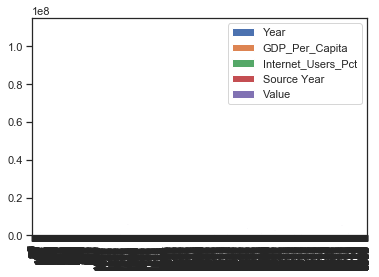

In [563]:
#attempt at plotting
top_employed = ['Indonesia', 'China', 'Brazil', 'Japan','Pakistan']
top_employed_trends = employed_and_gdp_and_internet_use.loc[employed_and_gdp_and_internet_use['Country'].isin(top_employed)].reset_index(drop=True)